In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import json
import matplotlib.pyplot as plt
import plotly.express as px
import tweets_utils
import importlib

%autosave 3600

Autosaving every 3600 seconds


In [2]:
bots = pd.read_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/bot_score.csv")
bots

,id,user
0,1252818873578975232,matomecorona
1,1239490346691760128,Host24Space
2,1203462567861084160,naija_reports
3,1238121032067801088,shopfle
4,1257388917369667584,NbknewsC
...,...,...
609,1180444353577144320,edunewsid
610,91430932,PascalRtl
611,734775583842914304,news_naira
612,3231019148,JayaKatwang15


In [3]:
credibility_url = pd.read_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/domain_credibility.csv")
credibility_url

,Domain,Class
0,100percentfedup.com,low
1,100percentfedup.com,high
2,10news.one,low
3,12minutos.com,low
4,12news.com,high
...,...,...
820,childrenshealthdefense.org,low
821,"AdvancedMedicineConference.com,",low
822,aol.com,high
823,trendingpolitics.com,low


In [4]:
retweet_name = []
retweet_id = []
retweeted_name = []
retweeted_id = []
rt_link = []
tweet_name = []
tweet_id = []
link = []

result = []

total_len = 0
original_len = 0
retweet_len = 0
reply_len = 0
d_total_len = 0
d_original_len = 0
d_retweet_len = 0
d_reply_len = 0

cols_tweets = [u'user_screen_name',u'user_id', u'created_at', 
               u'urls', u"rt_created_at", u"rt_user_id", 
               u"rt_user_screen_name", u'in_reply_to_user_id', 
               u'in_reply_to_screen_name', u'in_reply_to_status_id']

files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")

In [5]:
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, bots["user"]))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        #original post
        tweet_name.extend(lista[i]["original_names"])
        tweet_id.extend(lista[i]["original_ids"])
        link.extend(lista[i]["links"])
#         #user who retweet
        retweet_name.extend(lista[i]["retweet_users"])
        retweet_id.extend(lista[i]["retweet_ids"])
#         #user retweeted
        retweeted_name.extend(lista[i]["retweeted_users"])
        retweeted_id.extend(lista[i]["retweeted_ids"])
        rt_link.extend(lista[i]["rt_link"])

        #len
        total_len = total_len + lista[i]["total_len"]
        original_len = original_len + lista[i]["original_len"]
        retweet_len = retweet_len + lista[i]["retweet_len"]
        reply_len = reply_len + lista[i]["reply_len"]
        d_total_len = d_total_len + lista[i]["d_total_len"]
        d_original_len = d_original_len + lista[i]["d_original_len"]
        d_retweet_len = d_retweet_len + lista[i]["d_retweet_len"]
        d_reply_len = d_reply_len + lista[i]["d_reply_len"]

stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/COVID-19-Tweets\2020-01\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 1
Reading file: F:/COVID-19-Tweets\2020-02\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Mese numero 2
Reading file: F:/COVID-19-Tweets\2020-03\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Mese numero 3
Reading file: F:/COVID-19-Tweets\2020-04\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7


In [6]:
tweets_utils.stats(total_len, original_len, retweet_len, reply_len)

Number of total tweets: 66412411
Number of original tweets: 13999715
Number of retweet: 48312504
Number of reply: 4100192
Number of original_tweets: 21.08% of total tweets
Number of retweets: 72.75% of total tweets
Number of replies: 6.17% of total tweets
Check sum == len(tweets):  True


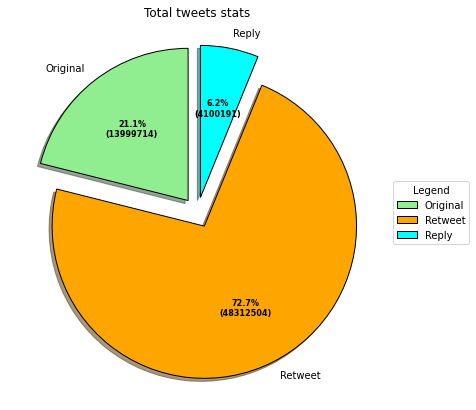

In [7]:
tweets_utils.print_pie_chart3("Total tweets stats","Original","Retweet", "Reply", original_len, retweet_len, reply_len)

In [8]:
tweets_utils.stats(d_total_len, d_original_len, d_retweet_len, d_reply_len)

Number of total tweets: 175324
Number of original tweets: 139213
Number of retweet: 36111
Number of reply: 0
Number of original_tweets: 79.4% of total tweets
Number of retweets: 20.6% of total tweets
Number of replies: 0.0% of total tweets
Check sum == len(tweets):  True


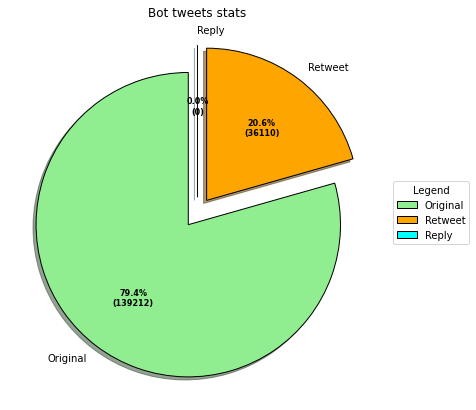

In [9]:
tweets_utils.print_pie_chart3("Bot tweets stats","Original","Retweet", "Reply", d_original_len, d_retweet_len, d_reply_len)